In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("customer_feature_engineering_assignment.csv")

In [3]:
data.head()

,Customer_ID,Age,Gender,City,Income,Customer_Since,Spending_Score
0,CUST2000,47,FEMALE,los angeles,NaN,"Jan 11, 2015",23.0
1,CUST2001,75,FeMale,Huston,"$22,348","Jan 03, 2019",8.0
2,CUST2002,40,Other,Huston,NaN,07-04-2018,12.0
3,CUST2003,31,Other,Houston,"$130,069",03-03-2019,28.0
4,CUST2004,-10,Male,Unknown,"$114,717","Sep 30, 2015",84.0


In [4]:
data.isnull().sum()

Customer_ID         0
Age                 0
Gender              0
City                0
Income            117
Customer_Since      0
Spending_Score     13
dtype: int64

In [5]:
data['Customer_Since'] = pd.to_datetime(data['Customer_Since'], dayfirst=True, errors='coerce')
print("Invalid dates:", data['Customer_Since'].isnull().sum())

Invalid dates: 0


In [6]:
data.shape

(1500, 7)

In [7]:
data.head()

,Customer_ID,Age,Gender,City,Income,Customer_Since,Spending_Score
0,CUST2000,47,FEMALE,los angeles,NaN,2015-01-11,23.0
1,CUST2001,75,FeMale,Huston,"$22,348",2019-01-03,8.0
2,CUST2002,40,Other,Huston,NaN,2018-04-07,12.0
3,CUST2003,31,Other,Houston,"$130,069",2019-03-03,28.0
4,CUST2004,-10,Male,Unknown,"$114,717",2015-09-30,84.0


In [8]:
data = data[data['Age'] > 0]

In [9]:
data.head()

,Customer_ID,Age,Gender,City,Income,Customer_Since,Spending_Score
0,CUST2000,47,FEMALE,los angeles,NaN,2015-01-11,23.0
1,CUST2001,75,FeMale,Huston,"$22,348",2019-01-03,8.0
2,CUST2002,40,Other,Huston,NaN,2018-04-07,12.0
3,CUST2003,31,Other,Houston,"$130,069",2019-03-03,28.0
5,CUST2005,52,FEMALE,Huston,"$120,937",2020-05-02,25.0


In [10]:
data.shape

(1480, 7)

In [11]:
duplicates = data.duplicated()
print(f"Duplicate entries: {duplicates.sum()}")

Duplicate entries: 0


In [12]:
data.shape

(1480, 7)

#### Part A: Outlier Detection (15 mins)

In [13]:
num_cols = data.select_dtypes(include=['number'])

In [14]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

data_cleaned = remove_outliers_iqr(data, num_cols)

In [15]:
data_cleaned.head()

,Customer_ID,Age,Gender,City,Income,Customer_Since,Spending_Score
0,CUST2000,47,FEMALE,los angeles,NaN,2015-01-11,23.0
1,CUST2001,75,FeMale,Huston,"$22,348",2019-01-03,8.0
2,CUST2002,40,Other,Huston,NaN,2018-04-07,12.0
3,CUST2003,31,Other,Houston,"$130,069",2019-03-03,28.0
5,CUST2005,52,FEMALE,Huston,"$120,937",2020-05-02,25.0


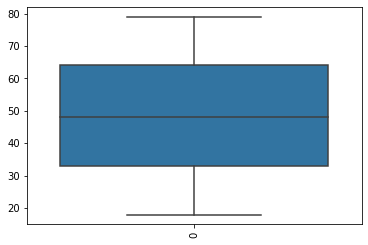

In [16]:
plt.figure()
sns.boxplot(data=data_cleaned["Age"])
plt.xticks(rotation=90)
plt.show()

In [17]:
data.shape

(1480, 7)

#### Part B: Feature Engineering & Transformation (15 mins)

In [18]:
data["Customer_Experience"]=2025-data.Customer_Since.dt.year

In [19]:
data.head()

,Customer_ID,Age,Gender,City,Income,Customer_Since,Spending_Score,Customer_Experience
0,CUST2000,47,FEMALE,los angeles,NaN,2015-01-11,23.0,10
1,CUST2001,75,FeMale,Huston,"$22,348",2019-01-03,8.0,6
2,CUST2002,40,Other,Huston,NaN,2018-04-07,12.0,7
3,CUST2003,31,Other,Houston,"$130,069",2019-03-03,28.0,6
5,CUST2005,52,FEMALE,Huston,"$120,937",2020-05-02,25.0,5


In [20]:
def classify_experience(years):
    if years <= 2:
        return "New"
    elif 3 <= years <= 5:
        return "Established"
    else:
        return "Loyal"

data['Customer_Category'] = data['Customer_Experience'].apply(classify_experience)

In [21]:
data.head()

,Customer_ID,Age,Gender,City,Income,Customer_Since,Spending_Score,Customer_Experience,Customer_Category
0,CUST2000,47,FEMALE,los angeles,NaN,2015-01-11,23.0,10,Loyal
1,CUST2001,75,FeMale,Huston,"$22,348",2019-01-03,8.0,6,Loyal
2,CUST2002,40,Other,Huston,NaN,2018-04-07,12.0,7,Loyal
3,CUST2003,31,Other,Houston,"$130,069",2019-03-03,28.0,6,Loyal
5,CUST2005,52,FEMALE,Huston,"$120,937",2020-05-02,25.0,5,Established


In [22]:
data['Income'] = data['Income'].replace('[\$,]', '', regex=True)
data['Income'] = pd.to_numeric(data['Income'], errors='coerce')

In [23]:
data['Income'].fillna(data['Income'].median(), inplace=True)

In [24]:
data['Spending_Score'].fillna(data['Spending_Score'].median(), inplace=True)

In [25]:
data['Gender'] = data['Gender'].str.title()
data['City'] = data['City'].str.title()

gender_mode = data.loc[data['Gender'] != 'Unknown', 'Gender'].mode()[0]
data['Gender'] = data['Gender'].replace('Unknown', gender_mode)

city_mode = data.loc[data['City'] != 'Unknown', 'City'].mode()[0]
data['City'] = data['City'].replace('Unknown', city_mode)

In [26]:
data = data[~duplicates]
data = data[data['Income'] > 0]

In [27]:
data['High_Spender'] = data['Spending_Score'].apply(lambda x: 1 if x > 75 else 0)

In [28]:
data.head()

,Customer_ID,Age,Gender,City,Income,Customer_Since,Spending_Score,Customer_Experience,Customer_Category,High_Spender
0,CUST2000,47,Female,Los Angeles,87236.0,2015-01-11,23.0,10,Loyal,0
1,CUST2001,75,Female,Huston,22348.0,2019-01-03,8.0,6,Loyal,0
2,CUST2002,40,Other,Huston,87236.0,2018-04-07,12.0,7,Loyal,0
3,CUST2003,31,Other,Houston,130069.0,2019-03-03,28.0,6,Loyal,0
5,CUST2005,52,Female,Huston,120937.0,2020-05-02,25.0,5,Established,0


#### Part B : Encoding and scaling

#### Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

In [30]:
# Label encode Gender
label_encoder = LabelEncoder()
data["Gender"] = label_encoder.fit_transform(data["Gender"])

oh_encoder = OneHotEncoder()
city_encoded = oh_encoder.fit_transform(data[["City"]])

data["City"] = ['_'.join(map(str, row.astype(int))) for row in city_encoded]

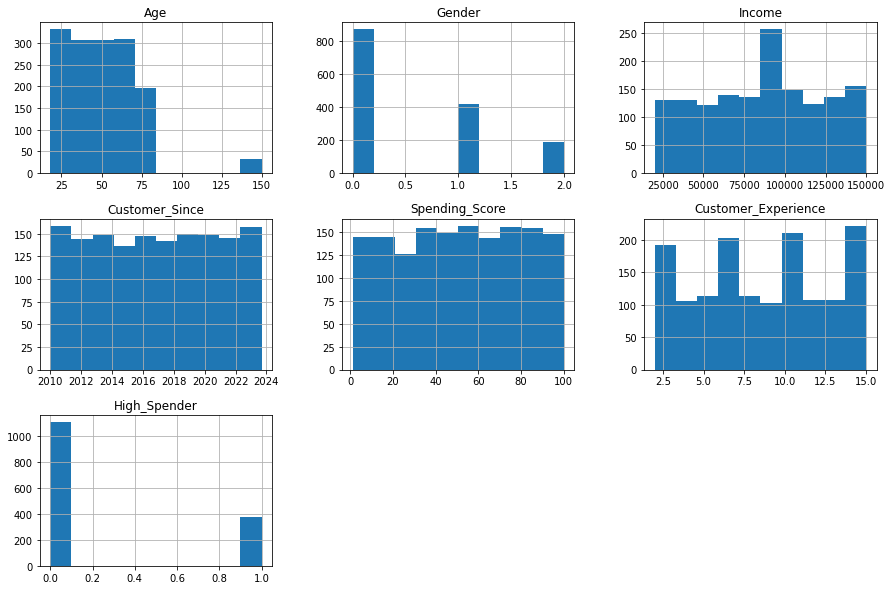

In [32]:
data.hist(figsize=(15,10))
plt.xticks(rotation=90)
plt.show()

#### Scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [37]:
minmax_scaler = MinMaxScaler()
data["Age"] = minmax_scaler.fit_transform(data[["Age"]])
data["Income"] = minmax_scaler.fit_transform(data[["Income"]])
data["Spending_Score"] = minmax_scaler.fit_transform(data[["Spending_Score"]])

In [38]:
data.head()

,Customer_ID,Age,Gender,City,Income,Customer_Since,Spending_Score,Customer_Experience,Customer_Category,High_Spender
0,CUST2000,0.219697,0,"(0, 2)\t1",0.517158,2015-01-11,0.222222,10,Loyal,0
1,CUST2001,0.431818,0,"(0, 1)\t1",0.017562,2019-01-03,0.070707,6,Loyal,0
2,CUST2002,0.166667,2,"(0, 1)\t1",0.517158,2018-04-07,0.111111,7,Loyal,0
3,CUST2003,0.098485,2,"(0, 0)\t1",0.846945,2019-03-03,0.272727,6,Loyal,0
5,CUST2005,0.257576,0,"(0, 1)\t1",0.776634,2020-05-02,0.242424,5,Established,0


In [39]:
std_scaler = StandardScaler()
data["Income"] = std_scaler.fit_transform(data[["Income"]])
data["Spending_Score"] = std_scaler.fit_transform(data[["Spending_Score"]])

In [40]:
data.head()

,Customer_ID,Age,Gender,City,Income,Customer_Since,Spending_Score,Customer_Experience,Customer_Category,High_Spender
0,CUST2000,0.219697,0,"(0, 2)\t1",0.019343,2015-01-11,-0.980928,10,Loyal,0
1,CUST2001,0.431818,0,"(0, 1)\t1",-1.778154,2019-01-03,-1.503888,6,Loyal,0
2,CUST2002,0.166667,2,"(0, 1)\t1",0.019343,2018-04-07,-1.364432,7,Loyal,0
3,CUST2003,0.098485,2,"(0, 0)\t1",1.205883,2019-03-03,-0.806607,6,Loyal,0
5,CUST2005,0.257576,0,"(0, 1)\t1",0.952913,2020-05-02,-0.911200,5,Established,0


#### Part D: Correlation & Analysis

                          Age    Gender    Income  Spending_Score  \
Age                  1.000000 -0.032686 -0.004053        0.011276   
Gender              -0.032686  1.000000  0.019715       -0.041411   
Income              -0.004053  0.019715  1.000000        0.028829   
Spending_Score       0.011276 -0.041411  0.028829        1.000000   
Customer_Experience  0.063384  0.016397  0.002075        0.015883   
High_Spender         0.014314 -0.034234  0.047362        0.747161   

                     Customer_Experience  High_Spender  
Age                             0.063384      0.014314  
Gender                          0.016397     -0.034234  
Income                          0.002075      0.047362  
Spending_Score                  0.015883      0.747161  
Customer_Experience             1.000000      0.031016  
High_Spender                    0.031016      1.000000  


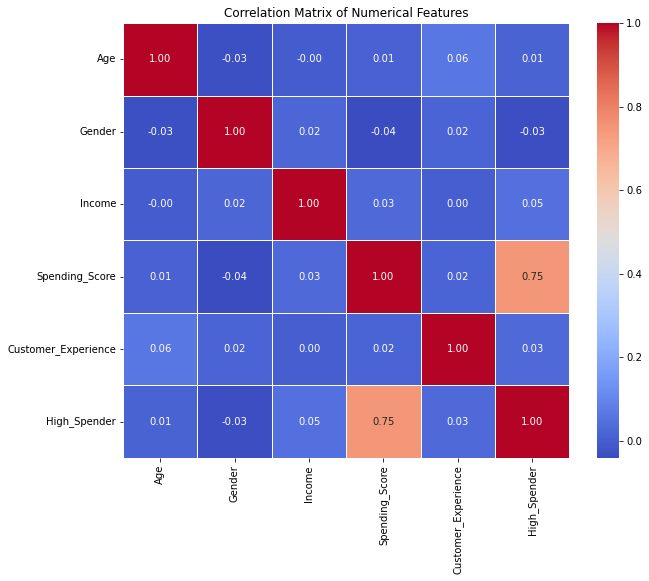

In [45]:
numerical_data = data.select_dtypes(include=['number'])

corr_matrix = numerical_data.corr()

print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

#### Top 2 Predictive Features for High Spenders
Spending_Score has a correlation with High_Spender of 0.747. Customers with higher spending scores are very likely to be labeled as high spenders.

Income has a Correlation with High_Spender of 0.047. While not strongly correlated, income still contributes slightly to the likelihood of being a high spender. People with more disposable income have more potential to spend.